<a href="https://colab.research.google.com/github/CHRISTINEMUTHEE/Hypothyroidism_Prediction/blob/main/Moringa_Data_Science_Core__Module_2_Independent_Project_2021_10_Christine_Muthee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning:Nairobi Hospital Hypothyroidism prediction

## 1. Defining the question

### The objective is to determine and analyse while predicting whether or not a patient's symptoms indicate that the patient has hypothyroidism

### a.) Specifying the question

### * What are the symptoms associated with hypothyroidism?
### * What is the main predictor of hypothyroidism
### * Does a patient haver hypothyroidism or not based on their symptoms?

### b.) Defining the metric of success

#### * What will determine my success is understanding the symptoms associated with hypothyroidism while establishing the cardinal symptoms to determining whether the patient has hypothyroidism or not.
#### * This will be achieved by building a machine learning model that predicts the hypothyroidism status upon entry/specification of symptoms.

### c.) Recording experimental design

#### * This will be achieved by observing the attributes in my data while assesing their relationships.
#### * Observing any omission and duplication while getting rid of unnecessary details.
#### * Building a model that best predicts whether suffers hypothyroidism or not.
#### * Optimizing the model to guage its performance while ensuring it provides optimum results

### d.) Data relevance

#### * The data contains the conditions of the patients including their individual attributes eg Gender,age,whether they are on medication,their lithium levels etc.
#### * The data also has the status of the patients : Whehther they suffer hypothyroidsm or not.
#### * The data is relevant for this analysis.

## 2. Reading the data

#### Importing all the necessary libraries

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
# Other ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
# Function to diable warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# A function to read the dataset
# url=http://bit.ly/hypothyroid_data
def Dataframe(data):
  df=pd.read_csv(data)
  return df


In [3]:
# Reading the data
df=Dataframe('http://bit.ly/hypothyroid_data')

## 3. Checking the data

In [4]:
# Checking the head of the data
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
# Checking the extreemities of the data
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [6]:
# Checking the structure of my dataset
print('My dataset has ',df.shape[0],'rows and ',df.shape[1],' Columns')

My dataset has  3163 rows and  26  Columns


In [7]:
# Checking my datatypes to assess the mode of analysis
df.dtypes
# All my datapoints are objects

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

## 4. External Dataset Validation

####  Validation: The components in the data indeed are associated with hyper and hypothyroidsm. This the dataset is valid for analysis. All the definitions can be found on the this link:https://glowm.com/resources/glowm/cd/pages/resources/Lab/Thyroid_Function_Tests.htm

## 5. Cleaning the dataset

Column review

In [8]:
# Converting the numerical datypes to integers and floats
df[['age','TSH','T3','TT4','T4U','FTI','TBG']]=df[['age','TSH','T3','TT4','T4U','FTI','TBG']].apply(pd.to_numeric,errors='coerce')
df.dtypes


status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

Missing values

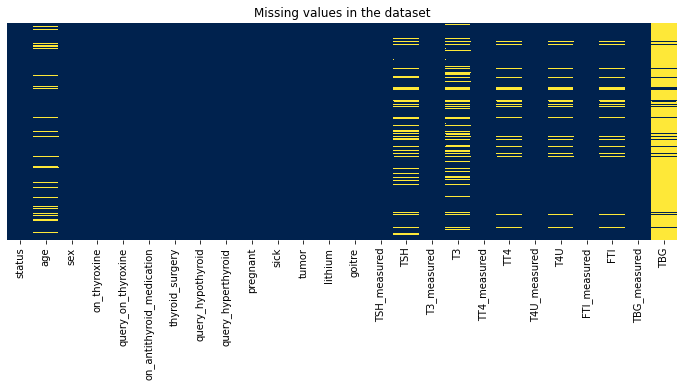

In [9]:
#Checking for missing values
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='cividis',yticklabels=False)
plt.title('Missing values in the dataset');
# There are missing values in the Age,TSH,T3,TT4,T4U,FF1,and the most missing values are found in the TBG column

In [10]:
#Checking the percentage of null values
def missing_percentage(data):
    p_miss=((data.isnull().sum() / len(data))*100)
    missing_value_df=pd.DataFrame({'percent_missing': p_miss},index=data.columns)
    return missing_value_df
print(missing_percentage(df))
print(df.shape)

                           percent_missing
status                            0.000000
age                              14.100537
sex                               0.000000
on_thyroxine                      0.000000
query_on_thyroxine                0.000000
on_antithyroid_medication         0.000000
thyroid_surgery                   0.000000
query_hypothyroid                 0.000000
query_hyperthyroid                0.000000
pregnant                          0.000000
sick                              0.000000
tumor                             0.000000
lithium                           0.000000
goitre                            0.000000
TSH_measured                      0.000000
TSH                              14.796080
T3_measured                       0.000000
T3                               21.972811
TT4_measured                      0.000000
TT4                               7.872273
T4U_measured                      0.000000
T4U                               7.840658
FTI_measure

In [11]:
# Dealing with missing values
def max_min(data,column):
  df1=data[column].max()
  df2=data[column].min()
  # df3=data[column].mode()
  df3=data[column].mean()
  print(df1,df2,df3)
max_min(df,'age')
max_min(df,'TSH')
max_min(df,'T3')
max_min(df,'TT4')
max_min(df,'FTI')
max_min(df,'TBG')

98.0 1.0 51.154214206845786
530.0 0.0 5.923179962894247
10.2 0.0 1.9397487844408425
450.0 2.0 108.85000000000001
881.0 0.0 115.39777091906723
122.0 0.0 31.28307692307692


In [12]:
# Filling the null values in the age,TSH,T3,TT4,T4U and FT1 column with the mean 
def missing_val(data,col):
  df=data[col].fillna(data[col].mean(),inplace=True)
  return df
missing_val(df,'age')
missing_val(df,'TSH')
missing_val(df,'T3')
missing_val(df,'TT4')
missing_val(df,'T4U')
missing_val(df,'FTI')

The main reason for this action is that and dropping the null values would warrant 14 and 21%  loss in the T3,TSH and about 7% of TT4 and FTI thus i have filled them with the mean for ease in analysis.
The 14% missing values in the age column were filled with the mean as it has the highest frequency and suits the distrubution of ages as will be seen in analysis.

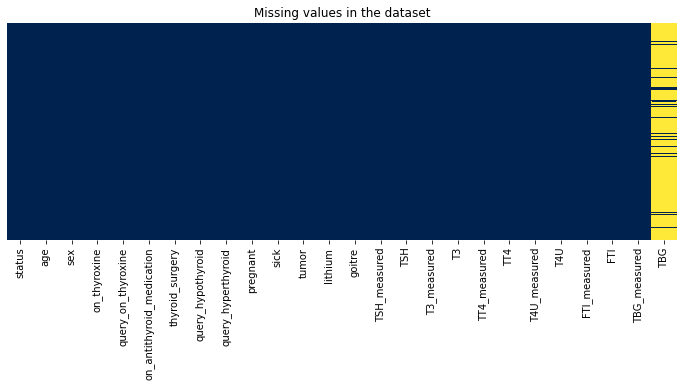

In [13]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='cividis',yticklabels=False)
plt.title('Missing values in the dataset'); 
# We have successfully filled the age column.thus will not be affected by fillna

91% is too much of a shift when filled with the mean thus the column will be dropped completely.

In [14]:
# Seeing that missing values 
# Filling the missing values with zero at the risk of skewing the TBG to the left this is for the purpose of analysis only
# Giving the dataset without missing values a variable to avoid confusion during misclassification
df1=df.drop(columns=['TBG'],axis=1)
df1.isnull().any()

status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                          False
T3_measured                  False
T3                           False
TT4_measured                 False
TT4                          False
T4U_measured                 False
T4U                          False
FTI_measured                 False
FTI                          False
TBG_measured                 False
dtype: bool

In [15]:
print('My dataset has ',df1.shape[0],'rows and ',df1.shape[1],' Columns')

My dataset has  3163 rows and  25  Columns


It is important to note that inputting a real number would affect my analysis and dropping the null values would warrant 21% and above loss in the T3,TSH and about 7% of TT4 and FTI thus i have filled them with zero for ease in analysis.
The 14% missing values in the age column were filled with the mean as it has the highest frequency and suits the distrubution of ages as will be seen in analysis.

Duplicates

In [16]:
# Checking for duplicated data
df1.duplicated().any().sum()
# Dropping the duplicated
df1.drop_duplicates(inplace=True)
# Confirming the operation
df1.duplicated().any().sum()

0

Anomalies and Outliers in categorical columns

In [17]:
# Checking for anomalies in my set begining with categorical columns
def value_counts(data,col):
  counts=data[col].value_counts()
  frame=pd.DataFrame({'counts':counts})
  print(frame)

In [18]:
# Checking for anomalies in status
value_counts(df1,'status')
df['status'].unique()
# No anomalies detected in status column

             counts
negative       2870
hypothyroid     141


array(['hypothyroid', 'negative'], dtype=object)

In [19]:
# # Checking for anomalies in sex
value_counts(df1,'sex')
# There is an anomaly in sex with an unclassified gender
df['sex'].unique()

   counts
F    2049
M     889
?      73


array(['M', 'F', '?'], dtype=object)

In [20]:
# # Using lambda function to replace the value ? with F/M to avoid loosing the rest of the data
df1['sex']=df1['sex'].apply(lambda x:'F/M' if x=='?' else('M' if x=='M' else 'F'))
df1['sex'].unique()

array(['M', 'F', 'F/M'], dtype=object)

In [21]:
# Checking for anomalies in on thyroxine column
value_counts(df1,'on_thyroxine')
# No anomalies detected in onthyroxine column

   counts
f    2565
t     446


In [22]:
# anomalies in query on thyroxine column
value_counts(df1,'query_on_thyroxine')
# No anomalies detected in that column

   counts
f    2956
t      55


In [23]:
# Checking for anomalies and outliers in on thyroid medication column.
value_counts(df1,'on_antithyroid_medication')
# No anomalies detected on that column/This applies to outliers

   counts
f    2969
t      42


In [24]:
# anomalies in thyroid surgery column
value_counts(df1,'thyroid_surgery')
# No anomalies detected on this column

   counts
f    2908
t     103


In [25]:
# The Query hypothyroid column
value_counts(df1,'query_hypothyroid')
# No anomalies detected and the total fit the number of rows in our column


   counts
f    2776
t     235


In [26]:
# Pregnant
value_counts(df1,'pregnant')
# No anomaly or outlier present

   counts
f    2950
t      61


In [27]:
#sick                                     
value_counts(df1,'sick')
# No outliers present in the sick column

   counts
f    2914
t      97


In [28]:
# With tumor
value_counts(df1,'tumor')
# No anomalies detected

   counts
f    2971
t      40


In [29]:
# Lithium
value_counts(df1,'lithium')
# No anomalies detected in the lithium volumn

   counts
f    3009
t       2


In [30]:
# Goitre
value_counts(df1,'goitre')
# No anomalies detected

   counts
f    2915
t      96


In [31]:
# looking for anomalies and ourliers in TSH column
value_counts(df1,'TSH_measured')

   counts
y    2631
n     380


In [32]:
value_counts(df1,'T3_measured')

   counts
y    2406
n     605


In [33]:
value_counts(df1,'TT4_measured')

   counts
y    2846
n     165


In [34]:
value_counts(df1,'T4U_measured')

   counts
y    2847
n     164


In [35]:
value_counts(df1,'FTI_measured')

   counts
y    2848
n     163


In [36]:
value_counts(df1,'TBG_measured')

   counts
n    2835
y     176


No anomalies detected in the aforementioned columns 

Anomalies and outliers in the continous variables

<function matplotlib.pyplot.show>

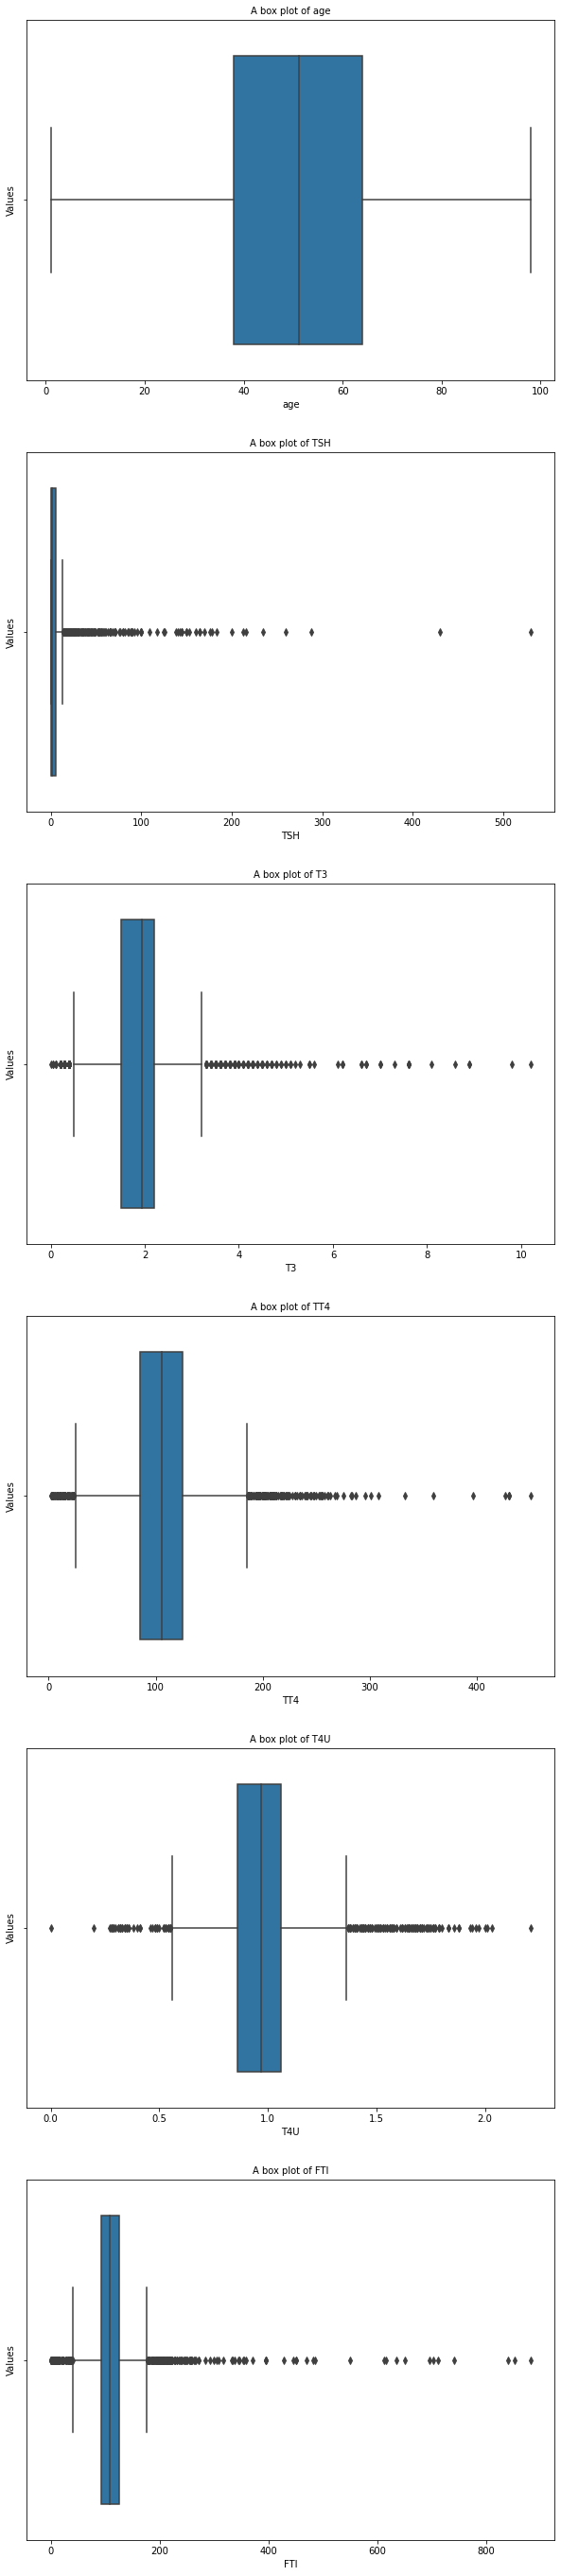

In [37]:
# Checking for outliers in the age column
cols=['age','TSH','T3','TT4','T4U','FTI']
fig,ax=plt.subplots(len(cols),figsize=(10,49))
for i,col_vals in enumerate(cols):
  sns.boxplot(x=df1[col_vals],ax=ax[i])
  ax[i].set_title('A box plot of '+format(col_vals),fontsize=10)
  ax[i].set_ylabel('Values')
plt.show

From this we can see that there are no outliers in the age column. It is to be noted that replacing null values with zero contributed to other values being regarded as outliers . This will be remedied by a less stringent outlier removal tool that will not chuck off all the outliers. Some outliers will be treated as genuine measurement by checking the range of hormonal count that can be gotten in a test from an external validation


In [38]:
# Using the zscore to asess my outlier count
from scipy import stats
z=np.abs(stats.zscore(df1[['age','TSH','T3','TT4','T4U','FTI']]))
# print(z)
# Setting a threshold of 3 to remove the values with a zscore value greater than 3
thresh=3
Clean_df=df1[(z<3).all(axis=1)]
print(Clean_df.shape)
print(Clean_df.isnull().any().sum())

(2819, 25)
0


It is to be noted that df is the dataset with missing values(exept for age and outliers (It will be used for desicion trees as they are quite robust to outliers.
Clean_df on the other hand is devoid of outliers and missing values and will be used for decision trees.
df1 will be used for analysis as the missing values have been filled with zero.

In [39]:
print(df.isnull().any().sum())# This has no null values appart from TBG column. Thus will be used for the desicion trees as the null values have been filled with the mean
print(df1.isnull().any().sum())# This set has TBG dropped as it 91 % of the set was made up of missing values.
print(Clean_df.isnull().any().sum())# Used for SVM since its clean and devoid of outliers.Trees are robust to outliers thus df1 will be used for trees.

1
0
0


## 6. Exploratory Data Analysis

### a.) Univariate Analysis

In [40]:
df1.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

Columns with continous data

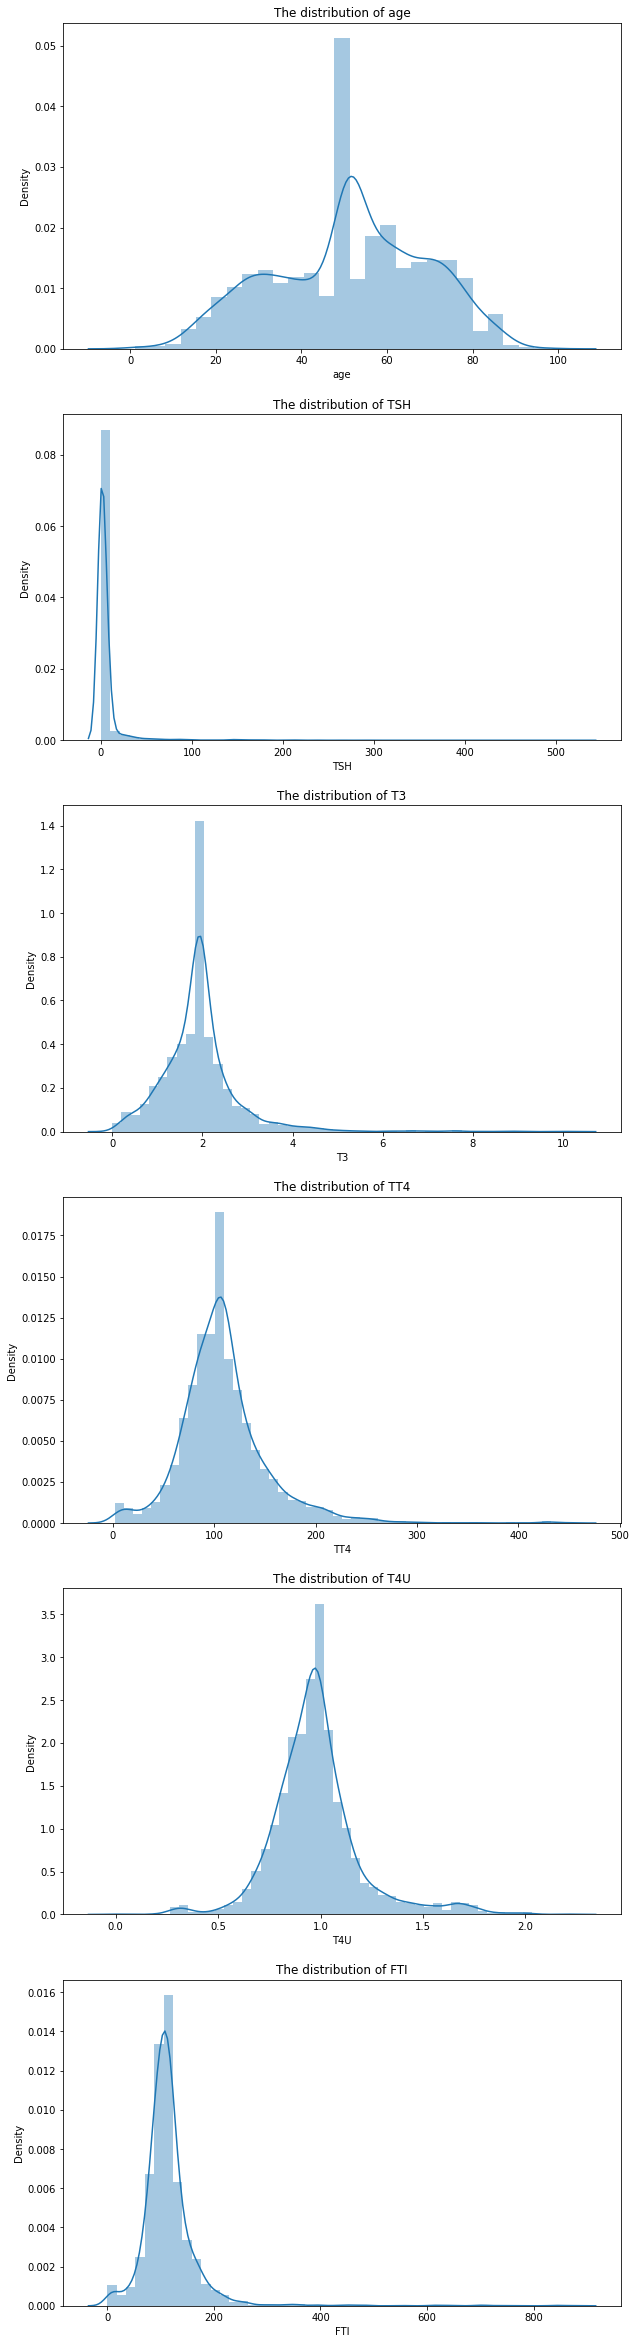

In [41]:
cont_col=[ 'age','TSH','T3','TT4','T4U','FTI']
fig,ax=plt.subplots(len(cont_col),figsize=(10,42))
for i,cols in enumerate(cont_col):
  sns.distplot(df1[cols],ax=ax[i]) 
  ax[i].set_title('The distribution of '+format(cols))

#### Categorical columns

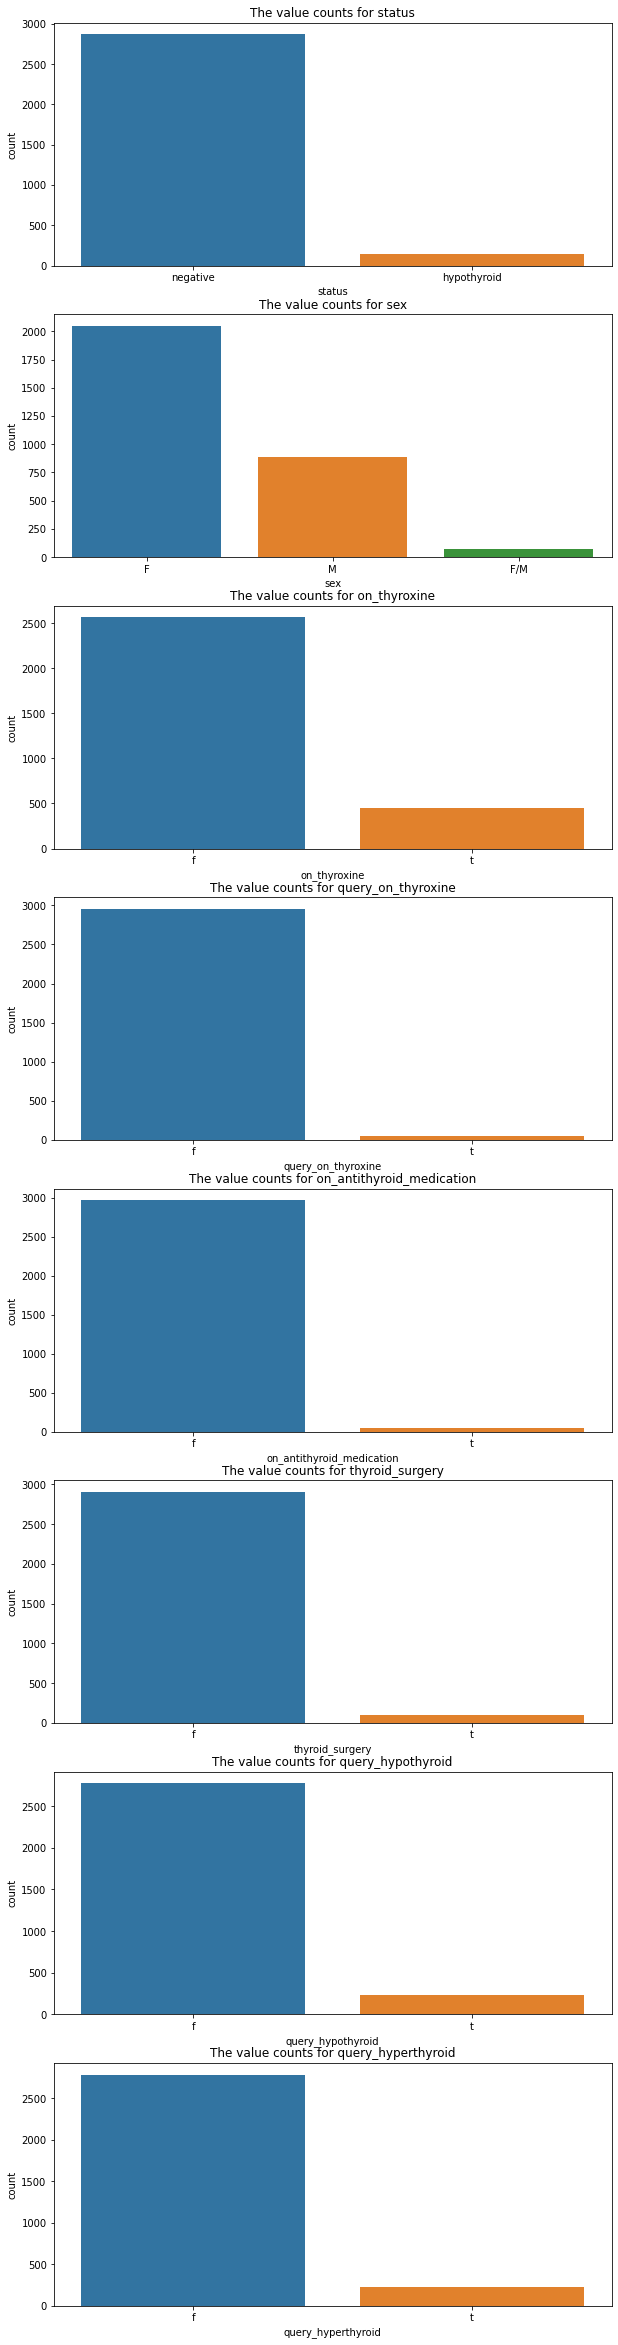

In [42]:
cats=['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid']
fig,ax=plt.subplots(len(cats),figsize=(10,42))
for i,cols in enumerate(cats):
  sns.countplot(df1[cols],order=df1[cols].value_counts().index,ax=ax[i]) 
  ax[i].set_title('The value counts for '+format(cols))

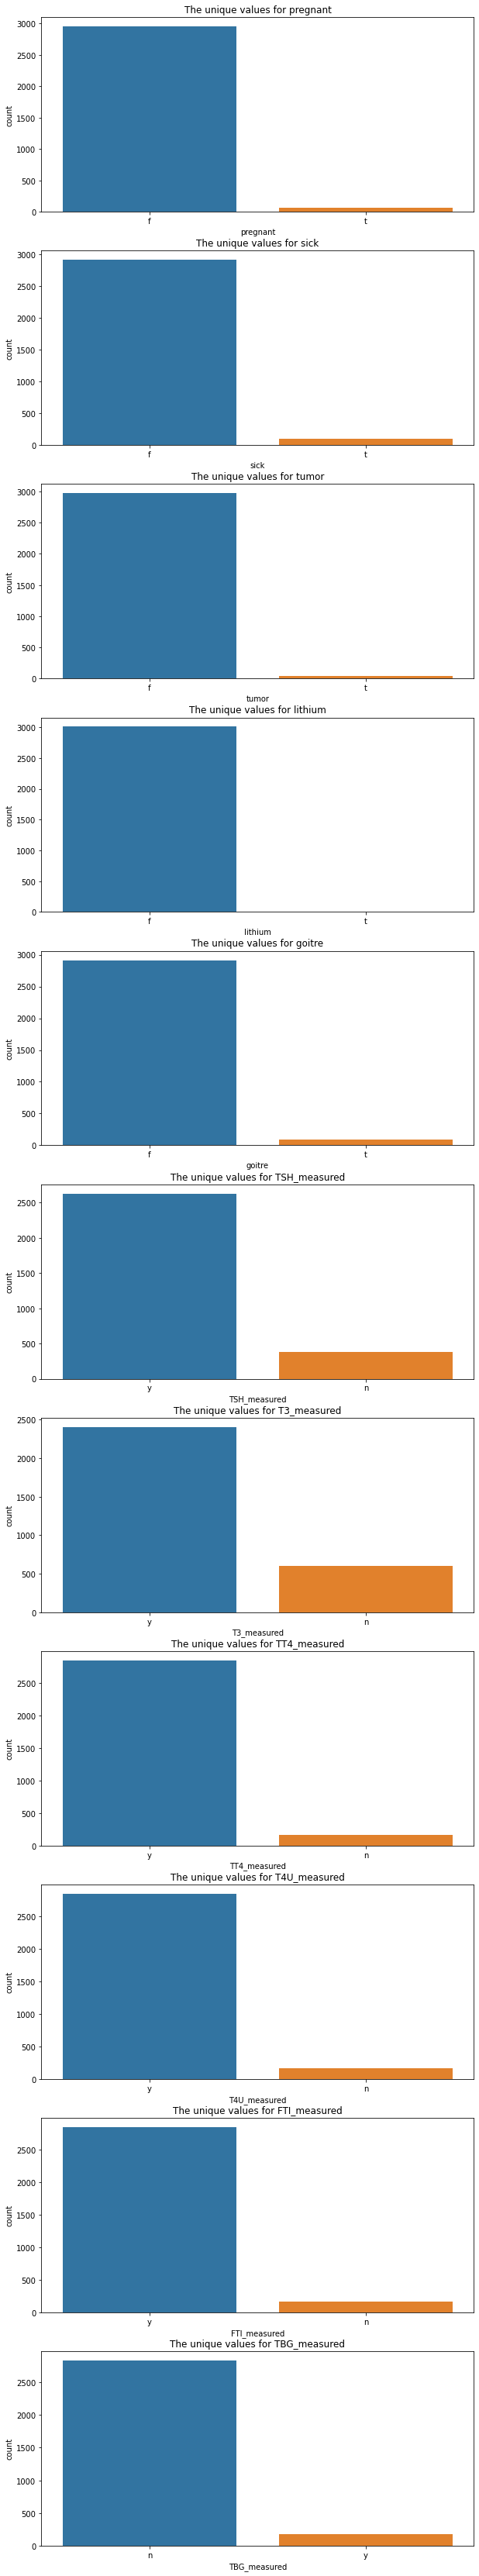

In [43]:
cats=['pregnant', 'sick', 'tumor', 'lithium', 'goitre','TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured']
fig,ax=plt.subplots(len(cats),figsize=(10,60))
for i,cols in enumerate(cats):
  sns.countplot(df1[cols],order=df1[cols].value_counts().index,ax=ax[i]) 
  ax[i].set_title('The unique values for '+format(cols))

#### Outcomes Continous and categorical columns

From the analysis above its is safe to note that:

* The age is normally distributed with the mode being equal to the mean this means that the most people in the set had their ages at the middle. This is also evident in the analysis prior to checking for missing values.

* TSH and T3 is positively skewed, This could be attributed to most values having a low count of the thyroid stimulating hormone and triiodothyromine hormone.

* TT4 (Thyroxine) distribution is slightly positively skewed with outliers measuring up t0 500.

* T4U is normally distributed while FT1 seems to be skewed with most values concentrated on the lower quantile.



For the categorical columns it is safe to note that:
* From the population at large, most people tested negative for hypothyroidism
* The propotion of women was greater than that of men in this study.
* Thyroxine drug is not commonly takes as 'f' represents false
* There are not as much queries about the thyroxine drugs since the count of queries is low.
* There are not as many people on antithyroid medicine.
* There are no much queries on hypothyroidism as well as hyperthyroidism as false is taking the lead in counts
* The population which is pregnant,sick,has a tumor and has goitre is less than that which is not.
* The patients who have taken TSH,T3,TT4,T4U ,FTI and TBG were more than those who havent.

### b.) Bivariate analysis

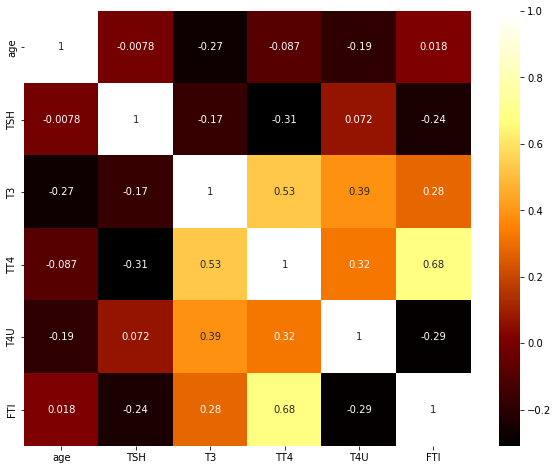

In [44]:
 # Slicing the numericalcolumns
 numerical = df1.select_dtypes(include=['int64','float64','Int64'])[:]
 numerical
 correlation=numerical.corr()
 # Checking the correlation in the set
 plt.figure(figsize=(10,8))
sns.heatmap(correlation, cmap="afmhot", annot=True)
plt.show() 

There is a moderatately fair postive correlation between TT4 na FTI measurements.(thyroxine and free thyroxine hormones)
There is a negative corelation between TSH and T4U measurement ,age and T4U etc

In [45]:
df1.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [46]:
def barplots(data,col1,col2):
  plt.figure(figsize=(10,6))
  sns.barplot(x=col1, y=col2,data=data, palette='Oranges_r')
  plt.title('The relationship between '+str(col1)+' and '+str(col2),fontsize=15)
  plt.show()

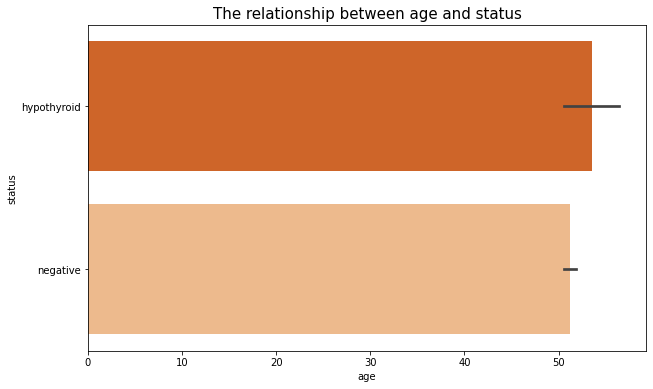

In [47]:
barplots(df1,'age','status')
# The age above 50 yrs suffers hypothyroidism at a higher rate.

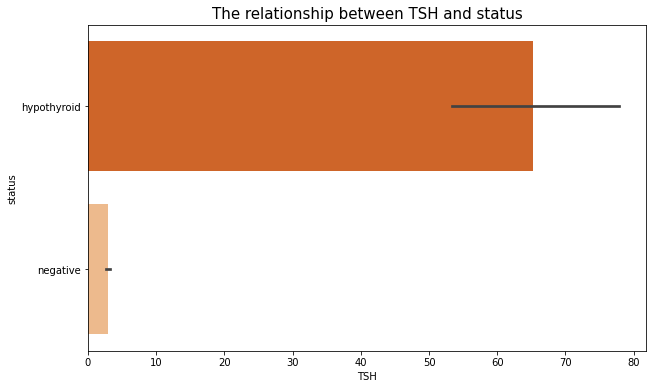

In [48]:
barplots(df1,'TSH','status')
# People with Higher Thyroid Stumulating hormones suffer from hypothyroidism.

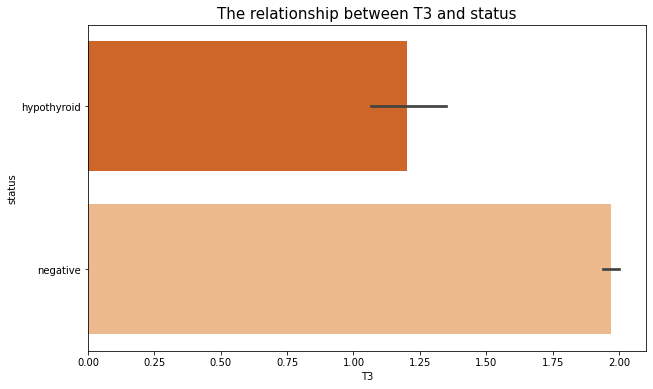

In [49]:
barplots(df1,'T3','status')
# People with higher tridothyronine dont suffer hypothyroidism.
# It is safe therefore to say that higher levels stimulate overeactive thyroid(HYPER-thyroidism)

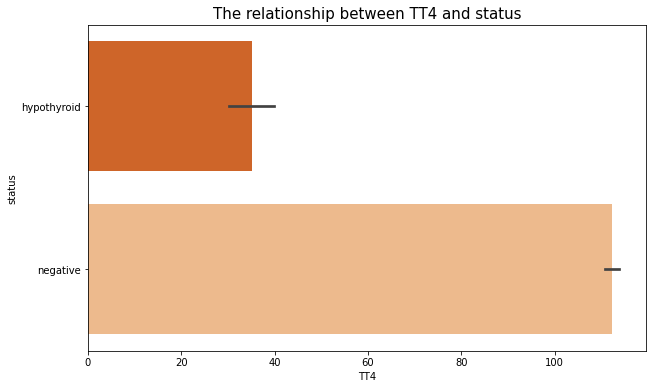

In [50]:
barplots(df1,'TT4','status')
# Higher levels of thyroxine indicate overactive thyroid what is called HYPER-thyroidism our data concentrates with the opposite of that.  
# It is clear that patients with higher levels of thyroxine dont suffer from HYPO-thyroidism.

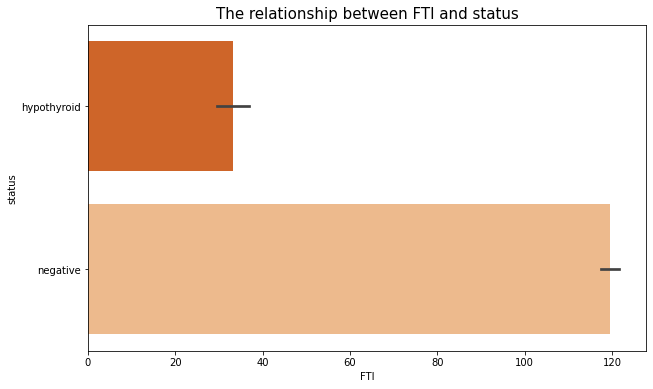

In [51]:
barplots(df1,'FTI','status')
# with Higher levels of Free thyroxine Index the test is negative. Meaning people with high FTI dont suffer hypothyrodism . 

Categorical categorical columns

In [52]:
def bar_cat(data,col1,hue):
  plt.figure(figsize=(10,6))
  sns.catplot(y=col1,hue=hue,kind='count',palette='inferno_r',data=data,orient='h')
  plt.title('The relationship between '+format(col1)+' and '+format(hue),fontsize=15)
  plt.show()

<Figure size 720x432 with 0 Axes>

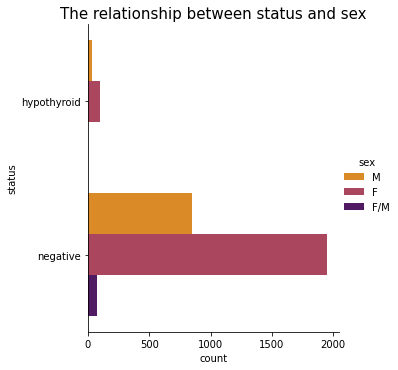

In [53]:
bar_cat(df1,'status','sex')
# Females suffer more from hypothyroidism as compared to males.
# The count of females without hyothiroidism is also greater than that of males

<Figure size 720x432 with 0 Axes>

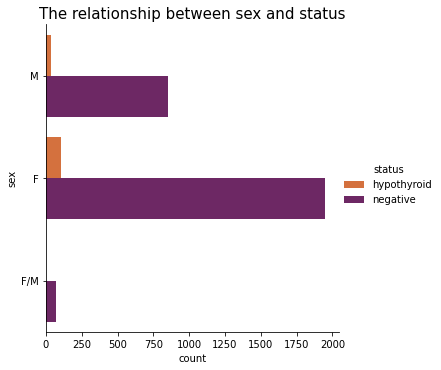

In [54]:
bar_cat(df1,'sex','status')
# while most people dont suffer from hypothyroidism female count is larger than male
# The unclassified gender is mostly negative

<Figure size 720x432 with 0 Axes>

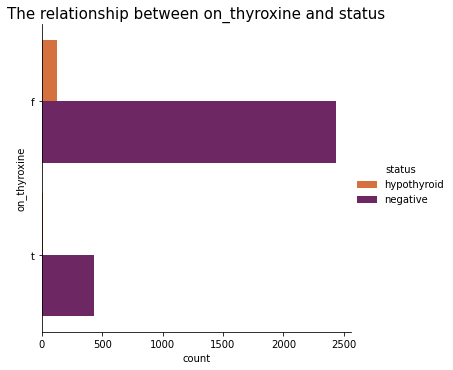

In [55]:
bar_cat(df1,'on_thyroxine','status')
# People on thyroxine medication don't suffer hypothyroidism
# However among the patients who are on thyroxine medication the smaller percentage suffers from hypothyroidism.

<Figure size 720x432 with 0 Axes>

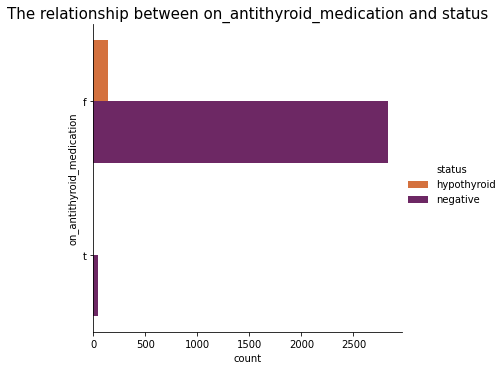

In [56]:
bar_cat(df1,'on_antithyroid_medication','status')
# T indicating true and f ,false, it is safe enough to note that patients who are on antithyroid medication dont suffer from hypothyroidism 
# In fact i would tend to think they take the antithyroid medicine because they suffer from HYPER-thyroidism (over reactive thyroid)
# The patients who infact are not on the antithyroid medication dont suffer from hypothyroidism either. Avery smmall nummber of them suffer form hypothyroidism

<Figure size 720x432 with 0 Axes>

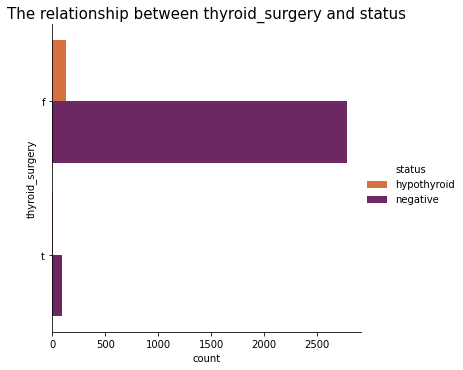

In [57]:
bar_cat(df1,'thyroid_surgery','status')
# The most patients that have undergone thyroid surgery do not suffer from hypothyroidism and those who have undergone,very few also seem to test negative .
# no patient who's undergone hyroid surgery tested positive for hypothyroidism

In [58]:
df1.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

<Figure size 720x432 with 0 Axes>

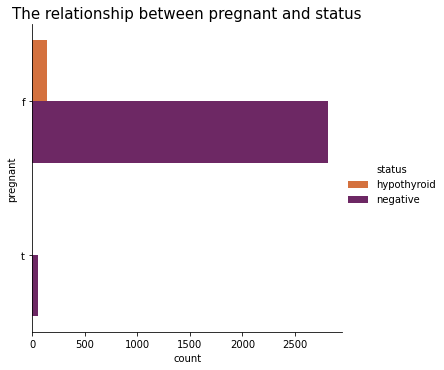

In [59]:
bar_cat(df1,'pregnant','status')
# There are very few pregnant patients and the pregnant ones seem to be populated around negative diagnosis for hypothyroidsm

<Figure size 720x432 with 0 Axes>

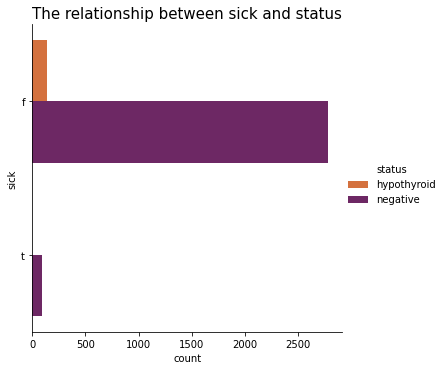

In [60]:
bar_cat(df1,'sick','status')
# Very few poeple who were not sick tested positive for hypothyroidism
# For the sick , most tested negative for hypothyroidism.

<Figure size 720x432 with 0 Axes>

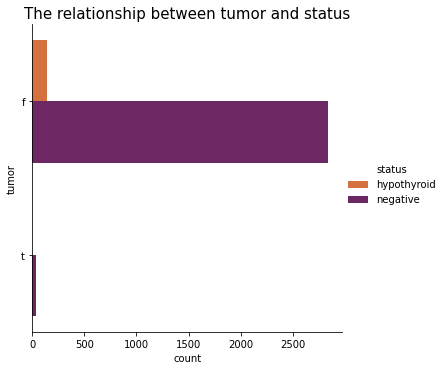

In [61]:
bar_cat(df1,'tumor','status')
# Most Patients with tumors tested negative for hypothyroidsm while those with no tumors were populated around negative diagnosis.

<Figure size 720x432 with 0 Axes>

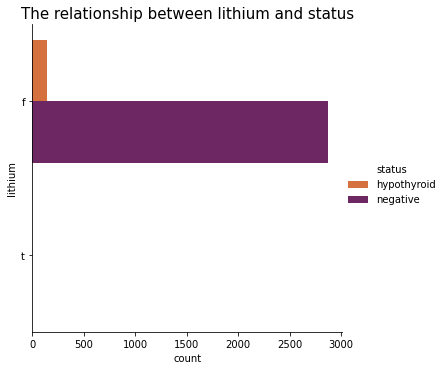

In [62]:
bar_cat(df1,'lithium','status')
# neither positive or positive diagnosis was seen in patients on lithium and those who were not on lithium were populated around negative diagnosis

<Figure size 720x432 with 0 Axes>

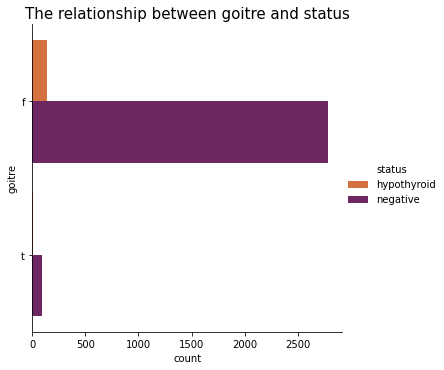

In [63]:
bar_cat(df1,'goitre','status')

#### Outcomes

From the relationship between the different columns it is safe to note that:

### c.) Multivariate analysis

In [64]:
def barplots(data,col1,col2,col3):
  plt.figure(figsize=(10,6))
  sns.barplot(x=col1, y=col2,data=data,hue=col3,palette='Greens_r')
  plt.title('The relationship between '+str(col1) +' , '+ str(col2) +' and '+str(col3),fontsize=15)
  plt.show()

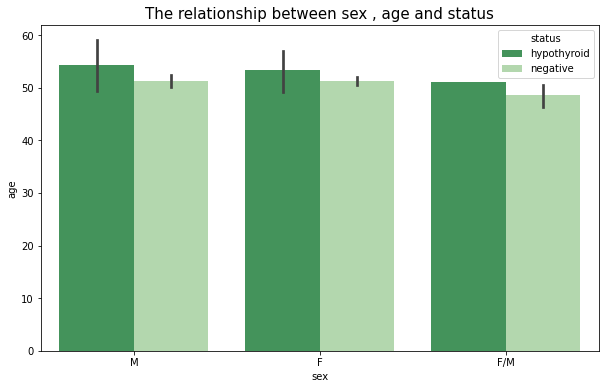

In [65]:
barplots(df1,'sex','age','status')

## 7. Feature Engineering

Encoding and reduction techniques

In [66]:
# Encoding the categorical columns to prepare them for analysis
le=LabelEncoder()
Cols=['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured']
for i in Cols:
  le.fit(df1[i])
  df1[i]=le.transform(df1[i])
df1
df1.dtypes
# Label w=enciding them all at once was because they didnt have numerous classes thus true is given a value of 1 and false 0 ,yes is given a value one and no 0 while male and female are given 0 and one respectively.

status                         int64
age                          float64
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
dtype: object

In [67]:
# Data preparation for modeling
df1.head()
# Confirmed and readi for preprocessing

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72.0,2,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,0,24.0,2,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,0,77.0,2,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0


## 8. Implementing the solution

#### Checking for multicorlinearlity

In [68]:
# Data preparation
# Features to be used in predictions as predictors
X_feat=df1.drop(columns=['status'],axis=1)
# X_feat will be used whien checcking the specific columns used in the trees
X=X_feat.values
X
# Extracting the target variable
Y_label=df1['status']
Y=Y_label.values
Y
# Calculating the Variance inflation factor of the specific columns
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_feat.values, i) for i in range(X_feat.shape[1])]
vif["features"] = X_feat.columns
vif


,VIF Factor,features
0,10.396948,age
1,1.605894,sex
2,1.386858,on_thyroxine
3,1.070623,query_on_thyroxine
4,1.044035,on_antithyroid_medication
5,1.046933,thyroid_surgery
6,1.116168,query_hypothyroid
7,1.188514,query_hyperthyroid
8,1.175280,pregnant
9,1.062140,sick


As expected and seen in the corlinearlity check, Thyroxine (T4U) and Free thyroxine index (FTI) have a high vif because they seem to explain similar variance within the dataset. on the removal of one of the column we will see the change in the vif of the set to avoid an instance of multicorlinearlity in training.

#####  Will drop the columns until most features have a VIF of below 10

In [69]:
# Removing measurements exhibiting high vif as they explain the same variance within the set
X_feat2=X_feat.drop(columns=['T4U_measured','T4U_measured','TT4_measured','TSH_measured','FTI_measured','TT4','T4U'],axis=1)
X_feat2
# Recheking the vif of the same set.
X1=X_feat2.values
X1
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_feat2.values, i) for i in range(X_feat2.shape[1])]
vif["features"] = X_feat2.columns
vif

,VIF Factor,features
0,6.627495,age
1,1.490597,sex
2,1.266622,on_thyroxine
3,1.036459,query_on_thyroxine
4,1.041629,on_antithyroid_medication
5,1.040295,thyroid_surgery
6,1.105400,query_hypothyroid
7,1.166300,query_hyperthyroid
8,1.098066,pregnant
9,1.058501,sick


Logistic Regression and Tree based algorithms such as Decision Tree, Random forest and gradient boosting, are not sensitive to the magnitude of variables. So standardization is not needed before fitting this kind of models

### Model

#### Baseline model:

1.Random Forest

In [70]:
#Using random forests as my baseline model
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y, test_size=0.2,random_state=1)
#Instantiating my model
forest=RandomForestClassifier(n_estimators=100,random_state=42,max_depth=6)
#Fitting my model
forest=forest.fit(X_train,Y_train)
# Predicting the results of my model
Y_forest_pred=forest.predict(X_test)
# Evaluating the model using accuracy score
ac=accuracy_score(Y_test,Y_forest_pred)
cm=confusion_matrix(Y_test,Y_forest_pred)
cr=classification_report(Y_test,Y_forest_pred)
# Printing the evaluations
print(ac)
print(cm)
print(cr)

0.9751243781094527
[[ 20  11]
 [  4 568]]
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        31
           1       0.98      0.99      0.99       572

    accuracy                           0.98       603
   macro avg       0.91      0.82      0.86       603
weighted avg       0.97      0.98      0.97       603



My model attained 97% accuracy , with 20 true positives and 568 true negative, this can be attributed to the influx in non-hypothyroidic patients in our samples. WE can not ignore the fact that there were still 11 false negatives and 4 false positive and an accuracy of 97% indicates a case of over fitting.
With a presicion of 98 % for diagnosing hypothyroidism i will optimize my model using (hyperparameter tuning) to ensure the parameters used are fit for the  model.

### Hyperparameter Tuning

In [71]:
# Using Grid search to obtain the besst params to have the best performing model.
# Obtaining the parameters that need to be tuned
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [72]:
# Using Grid search to obtain the best parameters to perform tuning

# Create a based model

rf = RandomForestClassifier()
#Obtaining the param grig
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 5, 10, 15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]}

# Using ROC_AUC score to check the performance of the model and its ability to distringuish between classes since they are binary
forest_search=GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           n_jobs=1,cv=3)
# Fitting the model
forest_search.fit(X_train,Y_train)
# # Obtaining the best model/estimator
best_model=forest_search.best_estimator_
# Making predictions using the best model
Y_search_pred=best_model.predict(X_test)


In [73]:
# # Getting the accuracy score
ac_search=accuracy_score(Y_test, Y_search_pred)
cm_search=confusion_matrix(Y_test,Y_search_pred)
cr_search=classification_report(Y_test,Y_search_pred)
# Printing the evaluations
print(ac_search)
print(cm_search)
print(cr_search)

0.9800995024875622
[[ 23   8]
 [  4 568]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        31
           1       0.99      0.99      0.99       572

    accuracy                           0.98       603
   macro avg       0.92      0.87      0.89       603
weighted avg       0.98      0.98      0.98       603



My model attained approximately 98% accuracy , with 22 true positives and 568 true negatives, this can be attributed to the influx in non-hypothyroidic patients in our samples. It is important to note that the number of false negatives reduced from the 11 in the random forest to 9 the number of false positives is the same as the random forests and that kind of accuracy is an alart, for over fitting.
The precision for predicting positives is greater than that of negatives . This model is performing much better than the random forest. 

Feature Importance

Text(0.5, 1.0, 'A plot of the features used for classification ')

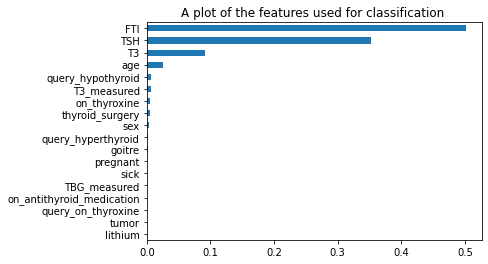

In [74]:
# Obtaining thr features used for prediction
importance_rf=pd.Series(best_model.feature_importances_,index=X_feat2.columns)
# Sorting the features
sorted=importance_rf.sort_values()
#Plotting the features with their importances
sorted.plot(kind='barh')
plt.title('A plot of the features used for classification ')

Only FTI,TSH,T3,age,query on hypothyroid,on thyroxine,measured T3 and sex were used for classification.

#### Gradient Boosting

In [75]:
# Using gradient boost to classify our set
grad_class=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=10)
# Fitting our training set
grad_class.fit(X_train,Y_train)
# predicting the diagnosis
Y_grad_pred=grad_class.predict(X_test)
# Measuring the accuracy of our model
ac_grad=accuracy_score(Y_test,Y_grad_pred)
cm_grad=confusion_matrix(Y_test,Y_grad_pred)
cr_grad=classification_report(Y_test,Y_grad_pred)
# Printing the accuracy score and classification report
print(ac_grad)
print(cm_grad)
print(cr_grad)

0.988391376451078
[[ 28   3]
 [  4 568]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.99      0.99      0.99       572

    accuracy                           0.99       603
   macro avg       0.93      0.95      0.94       603
weighted avg       0.99      0.99      0.99       603



My model attained 99% accuracy , with 28 true positives and 568 true negatives, this can be attributed to the influx in non-hypothyroidic patients in our samples. It is important to note that the number of false negatives reduced from the 11 in the random forest the number of false positives is the same as the random forests and that kind of accuracy is an alar, for over fitting.
The precision for predicting positives is greater than that of negatives . This model is performing much better than the random forest. We will use hyper parameters to get the right model to perform an exelent job at predicting the status of patients.

In [76]:
# Getting the parameters used in gradient boost
grad_class.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Hyperparameter Tuning for the grarient boosting parameters

In [77]:
gb = GradientBoostingClassifier()
# Obtaining the param grig
param_grid_grad = {'max_depth': [3, 5, 10, 15],
                    'max_features': [2, 3, 5 ],
                    'min_samples_leaf': [3, 4, 5, 8],
                    'min_samples_split': [8, 10, 12, 18, 20],
                    'n_estimators': [100, 200, 300]}

gradient_search=GridSearchCV(estimator=gb,
                           param_grid=param_grid_grad,
                           scoring='accuracy',
                           n_jobs=1,cv=5,verbose=1)


In [78]:
# Fitting the model
gradient_search.fit(X_train,Y_train)
# # Obtaining the best model/estimator
best_model_grad=gradient_search.best_estimator_
# Making predictions using the best model
Y_search_pred_grad=best_model_grad.predict(X_test)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed: 21.8min finished


In [79]:
# Measuring the accuracy of our model
ac_search_grad=accuracy_score(Y_test,Y_search_pred_grad)
cm_search_grad=confusion_matrix(Y_test,Y_search_pred_grad)
cr_search_grad=classification_report(Y_test,Y_search_pred_grad)
# Printing the accuracy score and classification report
print(ac_search_grad)
print(cm_search_grad)
print(cr_search_grad)

0.9900497512437811
[[ 29   2]
 [  4 568]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       1.00      0.99      0.99       572

    accuracy                           0.99       603
   macro avg       0.94      0.96      0.95       603
weighted avg       0.99      0.99      0.99       603



## 9. Challenging the solution

Challenging the solution using the Support Vector Machine model

In [80]:
# Using the data free of outliers and missing values to avoid instances of misclassification
Clean_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n
6,hypothyroid,64.0,F,f,f,f,t,f,f,f,f,f,f,f,y,7.7,y,1.3,y,54.0,y,0.86,y,63.0,n
7,hypothyroid,72.0,F,f,f,f,f,f,f,f,f,f,f,f,y,21.0,y,1.9,y,34.0,y,1.05,y,32.0,n


In [81]:
# Data Preparation
# Encoding the categorical columns to prepare them for analysis
le=LabelEncoder()
Cols=['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured']
for i in Cols:
  le.fit(Clean_df[i])
  Clean_df[i]=le.transform(Clean_df[i])
Clean_df.dtypes


status                         int64
age                          float64
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
dtype: object

In [82]:
# Data preparation
# Features to be used in predictions as predictors
X1_feat=Clean_df.drop(columns=['status'],axis=1)
# X_feat will be used whien checcking the specific columns used in the trees
X2=X1_feat.values
X2
# Extracting the target variable
Y1_label=Clean_df['status']
Y1=Y1_label.values
Y1
# Calculating the Variance inflation factor of the specific columns
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1_feat.values, i) for i in range(X1_feat.shape[1])]
vif["features"] = X1_feat.columns
vif

,VIF Factor,features
0,10.771849,age
1,1.624511,sex
2,1.440665,on_thyroxine
3,1.076101,query_on_thyroxine
4,1.047465,on_antithyroid_medication
5,1.049871,thyroid_surgery
6,1.111624,query_hypothyroid
7,1.153477,query_hyperthyroid
8,1.078633,pregnant
9,1.069006,sick


In [83]:
# Dropping all columns explaining the same variance
# Removing measurements exhibiting high vif as they explain the same variance within the set
X3_feat=X1_feat.drop(columns=['T4U_measured','T4U_measured','TT4_measured','TSH_measured','FTI_measured','TT4','T4U','FTI'],axis=1)
X3_feat
# Recheking the vif of the same set.
X2=X3_feat.values
X2
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X3_feat.values, i) for i in range(X3_feat.shape[1])]
vif["features"] = X3_feat.columns
vif

,VIF Factor,features
0,6.463451,age
1,1.505004,sex
2,1.259348,on_thyroxine
3,1.040140,query_on_thyroxine
4,1.045157,on_antithyroid_medication
5,1.043426,thyroid_surgery
6,1.104334,query_hypothyroid
7,1.139754,query_hyperthyroid
8,1.059890,pregnant
9,1.062065,sick


In [84]:
print(X2.shape)
print(Y1.shape)

(2819, 17)
(2819,)


In [85]:
# Spliting the data to train and testing
X_train,X_test,Y_train,Y_test=train_test_split(X2,Y1, test_size=0.2,random_state=1)
# Instantiating the model
model=SVC(kernel='linear')
#Fitting our model
model=model.fit(X_train,Y_train)
# Predicting using the support vectors
Y_svm_pred=model.predict(X_test)
# Acessing the accuracy of the model
# Measuring the accuracy of our model
ac_svm=accuracy_score(Y_test,Y_svm_pred)
cm_svm=confusion_matrix(Y_test,Y_svm_pred)
cr_svm=classification_report(Y_test,Y_svm_pred)
# Printing the accuracy score and classification report
print(ac_svm)
print(cm_svm)
print(cr_svm)

0.9822695035460993
[[ 10   9]
 [  1 544]]
              precision    recall  f1-score   support

           0       0.91      0.53      0.67        19
           1       0.98      1.00      0.99       545

    accuracy                           0.98       564
   macro avg       0.95      0.76      0.83       564
weighted avg       0.98      0.98      0.98       564



The svm predicted 10 true positives and 544 true negatives. There was just one false positive and nine false negatives.The recall for negative values was at 53%. The accuracy being stated as 98 % the model performed great with training data. But to avoid the case of over fitting hyper parameter tuning must be done.

In [86]:
# Instantiating the model
poly=SVC(kernel='poly',degree=3)
#Fitting our model
poly=poly.fit(X_train,Y_train)
# Predicting using the support vectors
Y_poly_pred=poly.predict(X_test)
# Acessing the accuracy of the model
# Measuring the accuracy of our model
ac_svm_poly=accuracy_score(Y_test,Y_poly_pred)
cm_svm_poly=confusion_matrix(Y_test,Y_poly_pred)
cr_svm_poly=classification_report(Y_test,Y_poly_pred)
# Printing the accuracy score and classification report
print(ac_svm_poly)
print(cm_svm_poly)
print(cr_svm_poly)

0.9769503546099291
[[  7  12]
 [  1 544]]
              precision    recall  f1-score   support

           0       0.88      0.37      0.52        19
           1       0.98      1.00      0.99       545

    accuracy                           0.98       564
   macro avg       0.93      0.68      0.75       564
weighted avg       0.97      0.98      0.97       564



In [87]:
# Instantiating the model
rbf=SVC(kernel='rbf')
#Fitting our model
rbf=rbf.fit(X_train,Y_train)
# Predicting using the support vectors
Y_rbf_pred=rbf.predict(X_test)
# Acessing the accuracy of the model
# Measuring the accuracy of our model
ac_svm_rbf=accuracy_score(Y_test,Y_rbf_pred)
cm_svm_rbf=confusion_matrix(Y_test,Y_rbf_pred)
cr_svm_rbf=classification_report(Y_test,Y_rbf_pred)
# Printing the accuracy score and classification report
print(ac_svm_rbf)
print(cm_svm_rbf)
print(cr_svm_rbf)

0.9769503546099291
[[  7  12]
 [  1 544]]
              precision    recall  f1-score   support

           0       0.88      0.37      0.52        19
           1       0.98      1.00      0.99       545

    accuracy                           0.98       564
   macro avg       0.93      0.68      0.75       564
weighted avg       0.97      0.98      0.97       564



The rgb and polynomial kernel seem be performing in the same manner.The number if false negatives has significanly increased as true positives seem to have decreased in number. The precision for predicting positive results is 98 % and all positive values were recalled. 

This model seems to have a slightly poor recall of the negatives . This could be attribute to using the wrong parameters and this warrants for tuning of the hyper parameters as this model is less overfit unlike the linear model.

We aim to see whether the model will improve its performance.

According to the feature importance of the tuned tree the two important features were found to be: FTI and TSH . This are the variables that will be tuned for vizualization.

Tuning the best performing model

In [90]:
# Defining the parameters for tuning
model.get_params() 

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [94]:
svm = SVC()
# Obtaining the param grig
param_grid_svm = {'C': [0.1,1,10,100,1000],
                    'gamma': [1,0.1,0.01,0.001,0.0001],
                    'kernel': ['rbf']}

svm_search=GridSearchCV(estimator=svm,
                           param_grid=param_grid_svm,
                           scoring='accuracy',
                           n_jobs=1,cv=5,verbose=1)


In [95]:
# Training the model
svm_search.fit(X_train,Y_train)
# Obtaining the best model for prediction
best_model_svm=svm_search.best_estimator_
# Making predictions using the best model
Y_pred_svm=best_model_svm.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    9.8s finished


In [96]:
# Evaluating the model
ac_svm_search=accuracy_score(Y_test,Y_pred_svm)
cm_svm_search=confusion_matrix(Y_test,Y_pred_svm)
cr_svm_search=classification_report(Y_test,Y_pred_svm)
# Printing the accuracy score and classification report
print(ac_svm_search)
print(cm_svm_search)
print(cr_svm_search)

0.9769503546099291
[[  8  11]
 [  2 543]]
              precision    recall  f1-score   support

           0       0.80      0.42      0.55        19
           1       0.98      1.00      0.99       545

    accuracy                           0.98       564
   macro avg       0.89      0.71      0.77       564
weighted avg       0.97      0.98      0.97       564



This model's accuracy is the same as the non tuned model. There are however more factors to consider here. The number of true postitives increased and false negatives decreased.On the down side, the number of false positives increased by one as well as decreasing the number of true negatives.

More negatives were recalled as compared to the non tuned model. The tuned model is a good performer generally as compared to the non tuned rbg model in the sense that our aim is to cub instances of misclassification.

### Visualizing the analysis.

## 10. Follow up questions

### a.) Did we have the right data?
Yes, the data we used was appropriate for analysis and also predictions. The predictor variables were relevant in providing predictions.A challenge was however experienced in decision trees where training the data on a tuned model was computationally tasking.

### b.) Did we need another set of data to answer our question?

The data provided was enough

## d.) What needs to be re-evaluated

The models need to be reassessed and frequently rechecked to mitigate instances of misclassification. 